# 7. Transformation functions

Coordinate transformations can be performed by matrix operations. Some common ones are:

\begin{equation}
\tag{Rotation about Origin}
\begin{bmatrix}
x_{\text{rotated}}\\y_{\text{rotated}}\\1
\end{bmatrix} = 
\begin{bmatrix}
\cos(\theta) & \sin(\theta) & 0 \\
-\sin(\theta) & \cos(\theta) & 0 \\
0 & 0 & 1 
\end{bmatrix}
\begin{bmatrix} x \\ y \\ 1 \end{bmatrix}
\end{equation}


\begin{equation}
\tag{Translation}
\begin{bmatrix}
x_{\text{translated}}\\y_{\text{translated}}\\1
\end{bmatrix} = 
\begin{bmatrix}
1 & 0 & \Delta x \\
0 & 1 & \Delta y \\
0 & 0 & 1 
\end{bmatrix}
\begin{bmatrix} x \\ y \\ 1 \end{bmatrix}
\end{equation}


\begin{equation}
\tag{Scale about Origin}
\begin{bmatrix}
x_{\text{scaled}}\\y_{\text{scaled}}\\1
\end{bmatrix} = 
\begin{bmatrix}
C_x & 0 & 0 \\
0 & C_y & 0 \\
0 & 0 & 1 
\end{bmatrix}
\begin{bmatrix} x \\ y \\ 1 \end{bmatrix}
\end{equation}



\begin{equation}
\tag{Mirror about $y$-axis}
\begin{bmatrix}
x_{\text{mirrored}}\\y_{\text{mirrored}}\\1
\end{bmatrix} = 
\begin{bmatrix}
-1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 
\end{bmatrix}
\begin{bmatrix} x \\ y \\ 1 \end{bmatrix}
\end{equation}


* In the **rotation matrix** it is assumed that the angle $\theta$ is a clockwise rotation.


* In the **translation matrix** $\Delta x$ and $\Delta y$ denote the absolute translation in the $x$- and $y$-direction, respectively.


* In the **scaling matrix** $C_x$ and $C_y$ denote the scaling in the $x$- and $y$-direction, respectively. 


* The **mirroring matrix** has no inputs and simply flips the sign for the directions to be mirrored. 

See more here: https://upload.wikimedia.org/wikipedia/commons/2/2c/2D_affine_transformation_matrix.svg

## Vectorization in `numpy`
`numpy` can perform calculation in a vectorized manner meaning that vector and matrix operations can be done on entire arrays at a time as opposed to value by value. 

>**Vectorization can eliminate the use of for-loops in many scenarios**
> 
>This makes the code easier to read and write. And as an added bonus, vectorized calculations are also much faster than their looping counterparts.

For the equations above, we can utilize vectorization by using an arrays of values for $x$ and $y$ instead of single values. That implies that $1$ also must be an array of ones with the same size.

Thus, each vector $[x, y, 1]^T$ on the right hand side of the equations are actually an **array of arrays.**

The resulting vector $[x_{\text{transformed}}, y_{\text{transformed}}, 1]^T$ is of course also an **array or arrays.**

## Unpacking values
A small example that demontrates unpacking of returned values from a function:


In [1]:
def f():
    '''
    Define function that takes no input and returns three values
    '''
    return 1, 2, 3

# Call function and save result in variable
result = f()
result

(1, 2, 3)

>**Note:** When returning multiple values from a function, they will by default be a `tuple`. This is basically the same as if the last line of the function would have been `return (1, 2, 3)`.

Unpacking the result to three variables:

In [2]:
# Unpack function output to three variables
a, b, c = f()

# Print a, b and c
a

1

In [3]:
b

2

In [4]:
c

3

As we see, if we do not unpack, all values are saved in a tuple. If we unpack all returned values, they each get assgined to a variable.

**But**, if we try to unpack only 2 values when the function returns 3 we get this error:

In [5]:
# ValueError, function returns 3 values, but only 2 unpacked
h, i = f()

ValueError: too many values to unpack (expected 2)

If we try to unpack too many values:

In [6]:
# ValueError, function returns 3 values, but 4 were unpacked
h, i, j, k = f()

ValueError: not enough values to unpack (expected 4, got 3)

> **When unpacking, the variables of the left side of the equal sign must exactly match the number of outputs, so all unpacked elements are accounted for.**

There are fancier ways to unpack which can handle cases where it is not known how many elements are to be unpacked. See for example https://www.python.org/dev/peps/pep-3132/. 

### Unpacking values for the transformation examples
The resulting array of arrays will have the following code structure

~~~python 
# Define an array of arrays
array_of_arrays = [ [x_values], [y_values], [ones] ]
~~~

**Unpacking** `x-values` and `y_values` to their own arrays can be done like this:

~~~python
# Unpack an array of arrays
x_values, y_values, ones = array_of_arrays
~~~

In this case, we don't care about the array of ones. It is a quite common scenario that a function returns some values that are not needed. 

>**It is common convention in Python to unpack unused variables to `_`**

Like this:

~~~python
# Convention for unpacking unused variables
x_transformed, y_transformed, _ = array_of_arrays
~~~

By following this convention, it is clear to readers of the code that this value is not going to be used throughout the program.


## Some `numpy` functions

### Function: `numpy.matmul`
This function will find the matrix product of two arrays:

In [7]:
import numpy as np

# Define a vector
a = np.array([1, 2, 3])

# Define a matrix
T = np.array([ [1, 1, 5], [3, 1, 1], [5, 0, 1] ])

# Compute the matrix product {T}x{a}
b = np.matmul(T, a) 
b

array([18,  8,  8])

### Function: `np.ones`
Creates an array of ones of a specified shape

In [8]:
# Create 5x1 vector of ones (1D array)
np.ones(5)

array([1., 1., 1., 1., 1.])

In [9]:
# Create 5x5 matrix of ones (2D array)
np.ones([5, 5])

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

# Exercise 1
Write a function that implements rotation of an array of coordinates `x` and `y`. The angle of rotation in clockwise direction should be an input parameter with default value of 90 degrees. The function should return the rotated coordinates `xr` and `yr`.

Test the function with these arrays.

```python
# Test arrays to transform
x = np.array([-5, 5, 5, 0.5, 0.5, 5, 5, -5, -5, -0.5, -0.5, -5, -5])
y = np.array([-8, -8, -6, -6, 6, 6, 8, 8, 6, 6, -6, -6, -8])
```

In [1]:
import numpy as np
from math import cos, sin, atan, pi
import matplotlib.pyplot as plt

x = np.array([-5, 5, 5, 0.5, 0.5, 5, 5, -5, -5, -0.5, -0.5, -5, -5])
y = np.array([-8, -8, -6, -6, 6, 6, 8, 8, 6, 6, -6, -6, -8])

def rot(x,y,theta=90):
    '''
    Rotate coordinate lists/arrays x and y rotated angle theta [deg] clockwise. 
    Returns the rotated coordinates as arrays.
    '''
    theta = pi * theta / 180

    R = np.array([[cos(theta),sin(theta),0],
                 [-sin(theta),cos(theta),0],
                 [0,0,1] ])
    xy1 = np.array([x,y,np.ones(len(x))])
    xr, yr , _ = np.matmul(R,xy1)
    return xr , yr

Gx, Gy = rot(x,y)
Gx


array([-8., -8., -6., -6.,  6.,  6.,  8.,  8.,  6.,  6., -6., -6., -8.])

# Exercise 2
Write a function that takes a pair of arrays of transformed coordinates `xt` and `yt` as input and plots them as a line plot. The function should be able to plot the original coordinates as well, but this should be optional and not plotted as default.

Plot the original shape from Exercise 1 together with the rotated shape.

*A good way of setting default values for parameters that should not be present as default is by setting them equal to None in the function definition. The code inside the function can then check if values were input or not.*

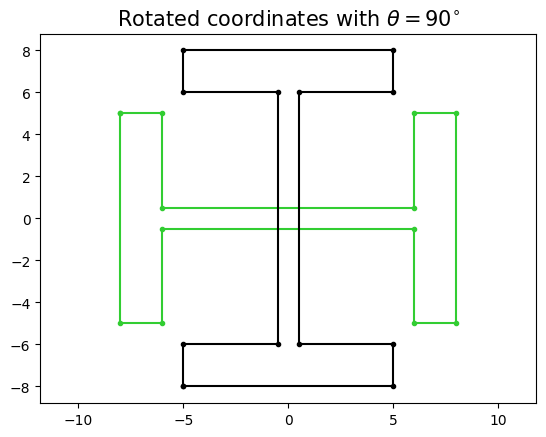

In [2]:
def plot_transform(xt, yt, x=None, y=None, title=None):
    ''' 
    Plot the transformed coordinates (xr, yr). Optionally plot the original coordinates (x, y).
    All four inputs are of type list or array and should all have same length. 
    Optionally give a title to the plot-function as a string.
    '''
    
    # Plot transformed coordintes
    plt.plot(xt, yt, '.-', color='limegreen')
    
    # Plot original coordinates if they were input
    if x is not None and y is not None:
        plt.plot(x, y, '.-', color='black')
        
    # Set title if that was input
    if title:
        plt.title(title, fontsize=15)
        
    # Set same scaling on x- and y-axis and show the plot
    plt.axis('equal')    
    plt.show()
    
    
# Plot rotated coordinates from previosly
rotate_title = 'Rotated coordinates with $\\theta = 90 ^{\circ} $'
plot_transform(Gx, Gy, x, y, title=rotate_title)

# Exercise 3
Write a function that implements translation of an array of coordinates `x` and `y`. The translation shall be defined by values (not arrays) `x_translate` and `y_translate`, which are the distance the points will move in the $x$- and $y$-direction, respectively.

Test the function with the arrays given in Exercise 1. Plot the translation with the function written in Exercise 2.

[[ 1  0  8]
 [ 0  1 10]
 [ 0  1  1]]


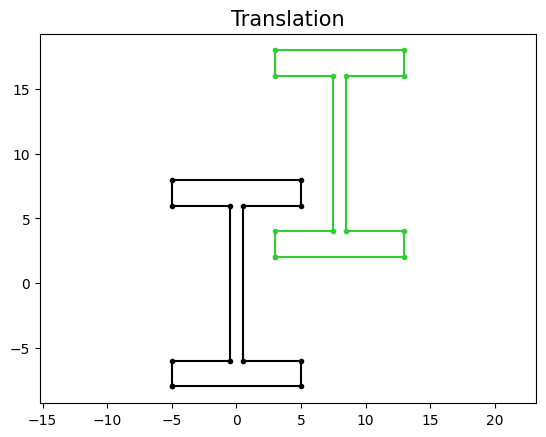

In [20]:
x = np.array([-5, 5, 5, 0.5, 0.5, 5, 5, -5, -5, -0.5, -0.5, -5, -5])
y = np.array([-8, -8, -6, -6, 6, 6, 8, 8, 6, 6, -6, -6, -8])
def translate (x,y,x_translate,y_translate):
    translate_array = np.array([[1,0,x_translate],
                               [0,1,y_translate],
                               [0,1,1]])
    print(translate_array)
    arr = np.array([x,y, np.ones(len(x))])
    xt, yt, _ = np.matmul(translate_array,arr)
    return xt, yt

xg , yg = translate(x,y,8,10)
plot_transform(xg,yg,x,y,title='Translation')

# Exercise 4
Implement the scaling transformation as a function. Test it by plotting it.

[[2 0 0]
 [0 2 0]
 [0 0 1]]


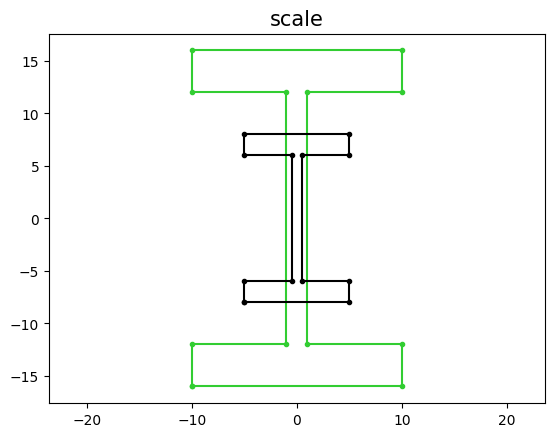

In [5]:
x = np.array([-5, 5, 5, 0.5, 0.5, 5, 5, -5, -5, -0.5, -0.5, -5, -5])
y = np.array([-8, -8, -6, -6, 6, 6, 8, 8, 6, 6, -6, -6, -8])
def scale (x,y,x_scale,y_scale):
    translate_array = np.array([[x_scale,0,0],
                               [0,y_scale,0],
                               [0,0,1]])
    print(translate_array)
    arr = np.array([x,y, np.ones(len(x))])
    xt, yt, _ = np.matmul(translate_array,arr)
    return xt, yt

xg , yg = scale(x,y,2,2)
plot_transform(xg,yg,x,y,title='scale')

# Exercise 5
Implement mirroring transformation about the $y$-axis as a function.

Since the given coordinates in Exercise 1 are symmetric about the $y$-axis, the mirrored coordinates will lie on top of the original ones. Try to test it by plotting.

You can quickly make a more visible test by moving all the $x$-coordinates, say 20 units to the right. Since we are using `numpy` this can be done by simply adding 20 to the array itself `x + 20`. This is refered to as Broadcasting.

[[-1  0  0]
 [ 0  1  0]
 [ 0  0  1]]


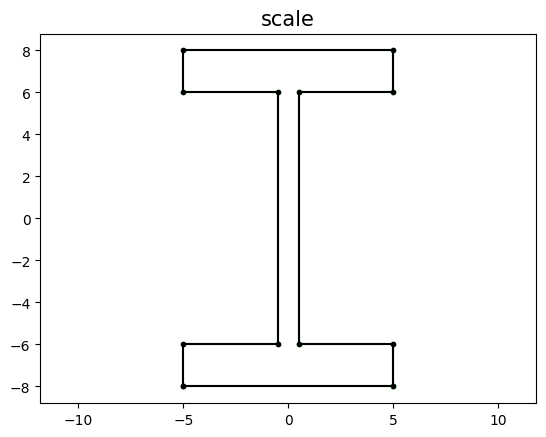

In [13]:
# x = x - 20
def mirror (x,y):
    translate_array = np.array([[-1,0,0],
                               [0,1,0],
                               [0,0,1]])
    print(translate_array)
    arr = np.array([x,y, np.ones(len(x))])
    xt, yt, _ = np.matmul(translate_array,arr)
    return xt, yt

xg , yg = mirror(x,y)
plot_transform(xg,yg,x,y,title='scale')

# Exercise 6
Write a function that combines all of the above transformations in one. 

It could have a structure like this:

```python
def transform(x, y, rotation=0, scaling=(1, 1), translation=(0, 0), mirroring=False):
    '''
    Perform a combined coordinate transformation according to given inputs. If no inputs are given, return the unchanged coordinates.

    Args:
        x (array)                   : x-values to transform.
        y (array)                   : y-values to transform.
        rotate (float, optional)    : Clockwise rotation angle in [deg]. Defaults to no rotation.
        scale (float, optional)     : Scaling factor in axes directions (cx, cy). Defaults to no scaling.
        translate (tuple, optional) : Translation in axes directions (dx, dy). Defaults to no translation.
        mirror (bool, optional)     : Whether or not to mirror the coordinates, Defaults to no mirroring.
    '''

    # Code here
```
* Remember that rotation and scaling are performed about the origin. So the order of operations will matter.
* If you wish, you can call the previously defined functions to perform the individual transformations. 
* Return the transformed coordinates xt, yt.

*When performing multiple transformations at once, the transformation matrices can be multiplied by each other prior to multiplication with the original coordinates. But since we have all the individual transformation functions already defined the solution will successively call those. The loss in calculation speed by performing the redundant multiplication is not noticeable for smaller datasets.*

[[2 0 0]
 [0 2 0]
 [0 0 1]]
[[-1  0  0]
 [ 0  1  0]
 [ 0  0  1]]
[[-1  0  0]
 [ 0  1  0]
 [ 0  0  1]]


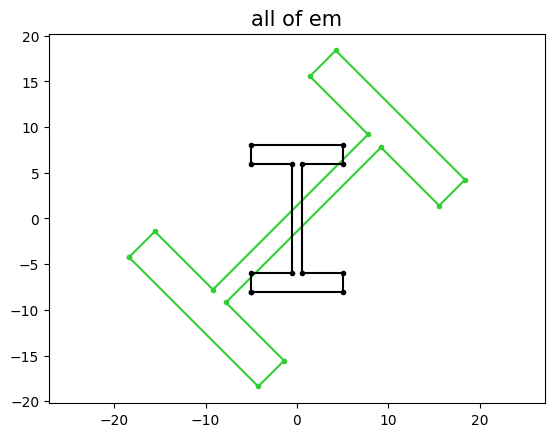

In [15]:
def transform(x, y, rotation=0, scaling=(1, 1), translation=(0, 0), mirroring=False):
    '''
    Perform a combined coordinate transformation according to given inputs. If no inputs are given, return the unchanged coordinates.

    Args:
        x (array)                   : x-values to transform.
        y (array)                   : y-values to transform.
        rotate (float, optional)    : Clockwise rotation angle in [deg]. Defaults to no rotation.
        scale (float, optional)     : Scaling factor in axes directions (cx, cy). Defaults to no scaling.
        translate (tuple, optional) : Translation in axes directions (dx, dy). Defaults to no translation.
        mirror (bool, optional)     : Whether or not to mirror the coordinates, Defaults to no mirroring.
    '''
    x_temp , y_temp = rot(x,y,rotation)
    x_temp, y_temp = scale(x_temp,y_temp,scaling[0],scaling[1])
    x_temp,y_temp = translate(x_temp,y_temp,translation[0],translation[1])
    if mirroring:
        x_temp,y_temp = mirror(x_temp,y_temp)
    return x_temp,y_temp
title2 = 'all of em'
xt,yt = transform(x,y,45,(2,2),(5,-5),True)
plot_transform(xt,yt,x,y,title2)

# Additional Exercise
Write an alternative function for translation where the translation input can be given as a distance that the points should move and the corresponding angle from the $x$-axis. This can often be useful instead of the one defined earlier where the distances are given parallel to the $x$- and $y$-axes.

[[1.         0.         8.00003347]
 [0.         1.         9.99997323]
 [0.         1.         1.        ]]


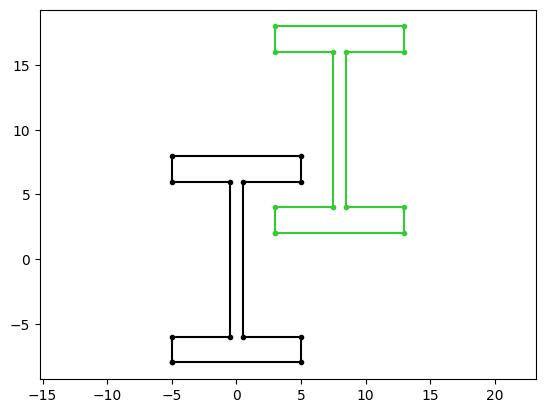

In [17]:
import math
def altranslate(x,y,dis,ang):
    ang = ang * pi / 180
    x_translate = dis * cos(ang)
    y_translate = dis * sin(ang)
    translate_array = np.array([[1,0,x_translate],
                               [0,1,y_translate],
                               [0,1,1]])
    print(translate_array)
    arr = np.array([x,y, np.ones(len(x))])
    xt, yt, _ = np.matmul(translate_array,arr)
    return xt, yt

xt, yt = altranslate(x,y,math.sqrt(164),51.34)

plot_transform(xt,yt ,x ,y )

# End of exercises

*The cell below is for setting the style of this document. It's not part of the exercises.*

In [10]:
from IPython.display import HTML
HTML('<style>{}</style>'.format(open('../css/cowi.css').read()))